In [128]:
import pandas as pd
import matplotlib.pyplot as plt

In [129]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV, LarsCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [130]:
df = pd.read_csv('DataPrepared.csv')

In [131]:
from sklearn.preprocessing import StandardScaler
X = df.drop(['title','score'], axis=1)
y = df[['score']]
scaler = StandardScaler(copy=True)
X_scaled = scaler.fit_transform(X)

#add x values with its scaled values
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
X

,episodes,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,source_Digital manga,source_Game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
0,0.006954,0.933538,-0.170035,-0.033652,-0.826757,-0.134975,-0.071965,-0.067207,-0.027386,-0.222604,...,-0.527532,-0.287311,1.167602,-0.307283,-0.289407,-0.557622,-0.609862,-0.535215,1.907692,-0.35387
1,0.324117,0.933538,-0.170035,-0.033652,-0.627860,-0.134975,-0.071965,-0.067207,-0.027386,-0.222604,...,-0.527532,-0.287311,1.167602,-0.307283,-0.289407,-0.557622,1.639715,-0.535215,-0.524194,-0.35387
2,0.890478,0.933538,0.598107,-0.033652,-0.495263,-0.134975,-0.071965,-0.067207,-0.027386,-0.222604,...,-0.527532,3.480553,-0.856456,-0.307283,-0.289407,1.793331,-0.609862,-0.535215,-0.524194,-0.35387
3,0.595970,0.933538,-0.938177,-0.466756,-0.826757,-0.134975,-0.071965,-0.067207,-0.027386,-0.222604,...,-0.527532,-0.287311,1.167602,-0.307283,-0.289407,-0.557622,-0.609862,1.868410,-0.524194,-0.35387
4,0.301462,0.933538,-0.170035,-0.033652,-0.428964,-0.134975,-0.071965,-0.067207,-0.027386,-0.222604,...,-0.527532,-0.287311,1.167602,-0.307283,-0.289407,1.793331,-0.609862,-0.535215,-0.524194,-0.35387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,-0.264899,-1.071193,0.598107,-0.250204,0.035127,-0.134975,-0.071965,-0.067207,-0.027386,-0.222604,...,-0.527532,-0.287311,1.167602,-0.307283,-0.289407,-0.557622,1.639715,-0.535215,-0.524194,-0.35387
10671,-0.242245,-1.071193,-0.170035,-1.170549,-0.760458,-0.134975,-0.071965,-0.067207,-0.027386,4.492277,...,1.895620,-0.287311,-0.856456,-0.307283,-0.289407,-0.557622,1.639715,-0.535215,-0.524194,-0.35387
10672,-0.242245,-1.071193,0.598107,-0.033652,0.565518,-0.134975,-0.071965,-0.067207,-0.027386,-0.222604,...,-0.527532,-0.287311,-0.856456,3.254330,-0.289407,-0.557622,-0.609862,-0.535215,1.907692,-0.35387
10673,-0.174281,-1.071193,-0.170035,-1.322136,1.228506,-0.134975,-0.071965,-0.067207,-0.027386,-0.222604,...,1.895620,-0.287311,-0.856456,-0.307283,-0.289407,-0.557622,-0.609862,-0.535215,1.907692,-0.35387


In [132]:
ols = LinearRegression()
ols.fit(X_train,y_train)


print(f"r^2 on train data is {ols.score(X_train, y_train)}")
print(f"r^2 on test data is {ols.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(ols.score(X_test, y_test) - ols.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,ols.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,ols.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,ols.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,ols.predict(X_test))}")


r^2 on train data is 0.5157646259457278
r^2 on test data is 0.512341247435248
r^2 dif on data is 0.003423378510479802

mean absolute error on the train data is is 0.49994529017127826
mean absolute error on the test data is is 0.5022595182821995
mean squared error on the train data is is 0.4148280395813702
mean squared error on the test data is is 0.41610462257026903


In [133]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error')
ridgecv.fit(X_train, y_train)
print(ridgecv.alpha_)

ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(X_train, y_train)
print(f"r^2 on train data is {ridge.score(X_train, y_train)}")
print(f"r^2 on test data is {ridge.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(ridge.score(X_test, y_test) - ridge.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,ridge.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,ridge.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,ridge.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,ridge.predict(X_test))}")


28.611838296751102
r^2 on train data is 0.5261275730645204
r^2 on test data is 0.5189178625308966
r^2 dif on data is 0.007209710533623848

mean absolute error on the train data is is 0.49377222254925457
mean absolute error on the test data is is 0.4974416642938084
mean squared error on the train data is is 0.40595045387014467
mean squared error on the test data is is 0.4104929936847578


In [134]:
y_test_pred = ridge.predict(X_test)
diff_all_shows = np.abs(y_test - y_test_pred)

under_5_mask = y_test < 5
diff_under_5 = diff_all_shows[under_5_mask]

over_5_mask = y_test >= 5
diff_over_5 = diff_all_shows[over_5_mask]

avg_diff_all_shows = np.mean(diff_all_shows)
avg_diff_under_5 = np.mean(diff_under_5)
avg_diff_over_5 = np.mean(diff_over_5)

print()
print(f"Average difference for all shows is {avg_diff_all_shows}")
print(f"Average difference for shows under 5 is {avg_diff_under_5}")
print(f"Average difference for shows over 5 is {avg_diff_over_5}")


Average difference for all shows is 0.4974416642938084
Average difference for shows under 5 is 1.014209657370557
Average difference for shows over 5 is 0.46969573177962054


In [135]:
lassocv = LassoCV(alphas = alphas, max_iter = 100000)
lassocv.fit(X_train, y_train)
print(lassocv.alpha_)

lasso = Lasso(alpha = lassocv.alpha_, max_iter = 100000)
lasso.fit(X_train, y_train)

print(f"r^2 on train data is {lasso.score(X_train, y_train)}")
print(f"r^2 on test data is {lasso.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(lasso.score(X_test, y_test) - lasso.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,lasso.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,lasso.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,lasso.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,lasso.predict(X_test))}")


c:\Users\simso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.005
r^2 on train data is 0.5205071554413006
r^2 on test data is 0.5172931482722452
r^2 dif on data is 0.0032140071690553995

mean absolute error on the train data is is 0.4958600601282339
mean absolute error on the test data is is 0.4972124364974149
mean squared error on the train data is is 0.41076527523428474
mean squared error on the test data is is 0.4118793137494036


In [136]:
elasticcv = ElasticNetCV(alphas = alphas, max_iter = 100000)
elasticcv.fit(X_train, y_train)
print(elasticcv.alpha_)

elastic = ElasticNet(alpha = elasticcv.alpha_, max_iter = 100000)
elastic.fit(X_train, y_train)

print(f"r^2 on train data is {elastic.score(X_train, y_train)}")
print(f"r^2 on test data is {elastic.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(elastic.score(X_test, y_test) - elastic.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,elastic.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,elastic.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,elastic.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,elastic.predict(X_test))}")


c:\Users\simso\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.005
r^2 on train data is 0.5242376132638292
r^2 on test data is 0.5192394793454224
r^2 dif on data is 0.004998133918406866

mean absolute error on the train data is is 0.494252363993294
mean absolute error on the test data is is 0.4966970876890999
mean squared error on the train data is is 0.40756951840160216
mean squared error on the test data is is 0.41021856767985854


In [137]:
larscv = LarsCV(max_iter = 100000)
larscv.fit(X_train, y_train)
print(larscv.alpha_)

print(f"r^2 on train data is {larscv.score(X_train, y_train)}")
print(f"r^2 on test data is {larscv.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(larscv.score(X_test, y_test) - larscv.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,larscv.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,larscv.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,larscv.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,larscv.predict(X_test))}")


c:\Users\simso\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0018737827542235916
r^2 on train data is 0.5251739277247669
r^2 on test data is 0.5196132202810739
r^2 dif on data is 0.005560707443692969

mean absolute error on the train data is is 0.49388633106658264
mean absolute error on the test data is is 0.49657647074426253
mean squared error on the train data is is 0.40676740952423845
mean squared error on the test data is is 0.4098996657219824


In [138]:
rf_regressor = RandomForestRegressor(criterion='absolute_error',n_estimators=150, max_depth=20, min_samples_split=200, min_samples_leaf=50,max_features='log2', random_state=42)

rf_regressor.fit(X_train, y_train)
print(f"r^2 on train data is {rf_regressor.score(X_train, y_train)}")
print(f"r^2 on test data is {rf_regressor.score(X_test, y_test)}")
print(f"r^2 dif on data is {abs(rf_regressor.score(X_test, y_test) - rf_regressor.score(X_train, y_train))}")
print()
print(f"mean absolute error on the train data is is {mean_absolute_error(y_train,rf_regressor.predict(X_train))}")
print(f"mean absolute error on the test data is is {mean_absolute_error(y_test,rf_regressor.predict(X_test))}")
print(f"mean squared error on the train data is is {mean_squared_error(y_train,rf_regressor.predict(X_train))}")
print(f"mean squared error on the test data is is {mean_squared_error(y_test,rf_regressor.predict(X_test))}")


c:\Users\simso\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


r^2 on train data is 0.3770616875123828
r^2 on test data is 0.37704229930300315
r^2 dif on data is 1.9388209379633814e-05

mean absolute error on the train data is is 0.5675707885752352
mean absolute error on the test data is is 0.5721641688522544
mean squared error on the train data is is 0.5336501478316262
mean squared error on the test data is is 0.5315511667994671


In [139]:
# df.loc[[0]].drop(['title','score'], axis=1)
for i in range(20):
    print(lasso.predict(X.loc[[i]]))
    display(df.loc[[i]])

[7.53306376]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
0,Inu x Boku SS,12,7.63,True,1,24.0,13,False,False,False,...,False,False,True,False,False,False,False,False,True,False


[7.40071541]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
1,Seto no Hanayome,26,7.89,True,1,24.0,16,False,False,False,...,False,False,True,False,False,False,True,False,False,False


[7.38015314]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
2,Shugo Chara!! Doki,51,7.55,True,2,24.0,18,False,False,False,...,False,True,False,False,False,True,False,False,False,False


[6.73234433]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
3,Princess Tutu,38,8.21,True,0,16.0,13,False,False,False,...,False,False,True,False,False,False,False,True,False,False


[7.51589564]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
4,Bakuman. 3rd Season,25,8.67,True,1,24.0,19,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[6.89991964]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
5,Yume-iro Pâtissière,50,8.03,False,4,24.0,19,False,False,False,...,True,False,False,False,False,True,False,False,False,False


[6.83003598]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
6,Ultra Maniac,26,7.26,True,0,24.0,12,False,False,False,...,True,False,False,False,False,False,True,False,False,False


[7.61806175]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
7,Shakugan no Shana II (Second),24,7.72,True,1,24.0,29,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.58898674]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
8,Nodame Cantabile: Paris-hen,11,8.24,False,2,23.0,27,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.88902293]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
9,Ouran Koukou Host Club,26,8.34,True,4,23.0,22,False,False,False,...,False,False,True,False,False,False,True,False,False,False


[7.58082286]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
10,Junjou Romantica 2,12,8.15,True,2,24.0,18,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.34565875]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
11,Kaichou wa Maid-sama!,26,8.2,True,1,24.0,21,False,False,False,...,False,False,True,False,False,False,True,False,False,False


[7.57563476]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
12,Sekaiichi Hatsukoi 2,12,8.23,True,2,24.0,20,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[8.26783752]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
13,Tonari no Kaibutsu-kun,13,7.71,True,3,24.0,22,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[8.18028204]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
14,Bleach,366,7.9,True,0,24.0,6,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.28632422]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
15,Chobits,26,7.53,True,0,24.0,7,False,False,False,...,False,False,True,False,False,False,True,False,False,False


[8.14541668]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
16,Kimi ni Todoke,25,8.13,True,1,22.0,14,False,False,False,...,False,False,True,False,False,True,False,False,False,False


[7.98830465]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
17,Naruto: Shippuuden,500,8.18,True,1,23.0,18,False,False,False,...,False,False,True,False,False,False,False,False,True,False


[7.24388935]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
18,Ranma ½,161,7.85,True,2,24.0,7,False,False,False,...,False,False,False,False,True,False,True,False,False,False


[7.5274553]


,title,episodes,score,is_licensed,nr_synonyms,min_duration,title_len,source_4-koma manga,source_Book,source_Card game,...,rating_G - All Ages,rating_PG - Children,rating_PG-13 - Teens 13 or older,rating_R - 17+ (violence & profanity),rating_R+ - Mild Nudity,release_season_Fall,release_season_Spring,release_season_Summer,release_season_Winter,Hentai
19,Toradora!,25,8.39,True,1,24.0,9,False,False,False,...,False,False,True,False,False,True,False,False,False,False


In [140]:
dfDiff = df.copy()
only_score_titles = dfDiff[['title','score']]
dfDiff = pd.concat([only_score_titles, X], axis=1)

# ols.predict(dfDiff.drop(['title', 'score'], axis=1))
dfDiff['predictedScores'] = rf_regressor.predict(dfDiff.drop(['title', 'score'], axis=1)).round(2)
dfDiff['scoreDiff'] = dfDiff['predictedScores'] - dfDiff['score']
display(dfDiff[['title', 'score' ,'predictedScores','scoreDiff']])
dfDiff[['title', 'score' ,'predictedScores','scoreDiff']].sort_values(by=['scoreDiff'])

,title,score,predictedScores,scoreDiff
0,Inu x Boku SS,7.63,7.27,-0.36
1,Seto no Hanayome,7.89,7.22,-0.67
2,Shugo Chara!! Doki,7.55,7.06,-0.49
3,Princess Tutu,8.21,6.95,-1.26
4,Bakuman. 3rd Season,8.67,7.24,-1.43
...,...,...,...,...
10670,Doupo Cangqiong 2nd Season,7.20,6.68,-0.52
10671,Diamond Fusion,7.27,5.84,-1.43
10672,Hitori no Shita: The Outcast Recap,6.04,6.85,0.81
10673,Inazuma Eleven x Kaitou Gru no Tsuki Dorobou,5.87,6.17,0.30


,title,score,predictedScores,scoreDiff
2663,Shelter,8.41,5.86,-2.55
826,Kimi no Na wa.,9.19,6.88,-2.31
4953,Pingu in the City,8.66,6.37,-2.29
4791,Steins;Gate 0,9.15,6.90,-2.25
9818,Ginga Eiyuu Densetsu,9.11,6.87,-2.24
...,...,...,...,...
2142,Kokuhaku,2.38,6.06,3.68
2821,Abunai Sisters: Koko & Mika,2.61,6.40,3.79
3797,Utsu Musume Sayuri,2.08,6.04,3.96
6554,Hametsu no Mars,2.33,6.46,4.13


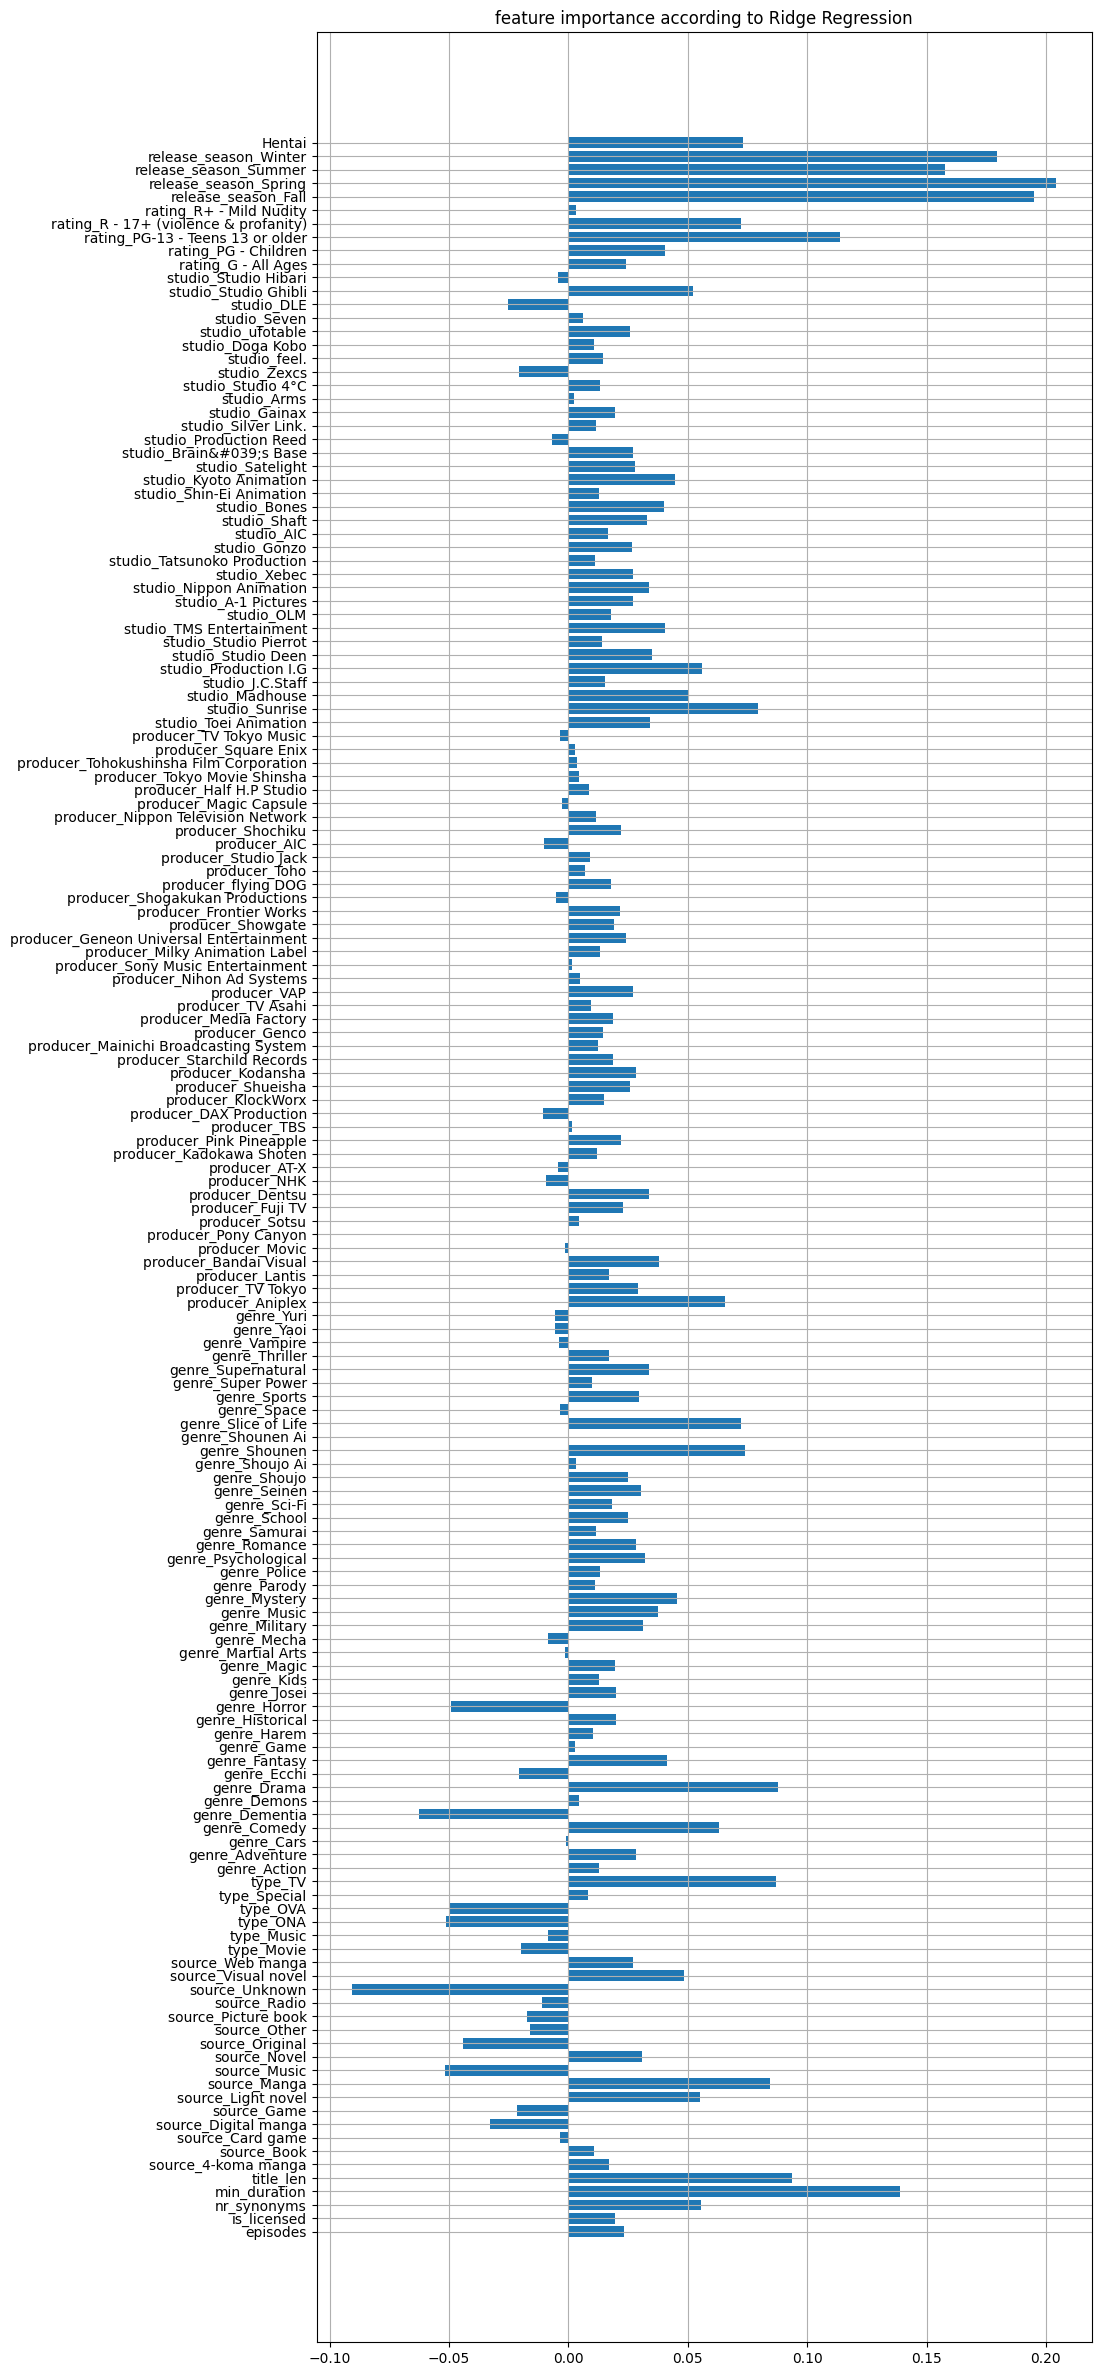

In [141]:
plt.figure(figsize=(10,30))
plt.title('feature importance according to Ridge Regression')
plt.barh(X.columns,ridge.coef_[0], align='center')
plt.grid()
plt.show()

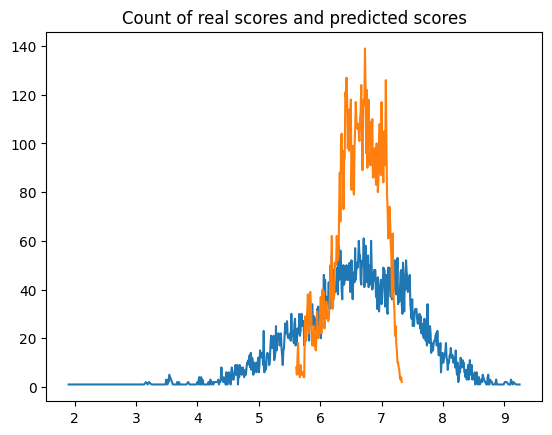

In [142]:
groupedOnScoreCountDiffReal = dfDiff[['score','title']].groupby('score').count()
groupedOnScoreCountDiffPredicted = dfDiff[['predictedScores','title']].groupby('predictedScores').count()
# groupedOnScoreCountDiff
plt.title('Count of real scores and predicted scores')
plt.plot(groupedOnScoreCountDiffReal.index,groupedOnScoreCountDiffReal.values.flat)
plt.plot(groupedOnScoreCountDiffPredicted.index,groupedOnScoreCountDiffPredicted.values.flat)
plt.show()

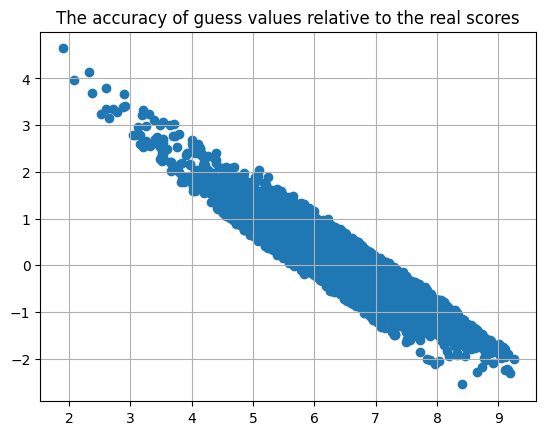

In [143]:
plt.title('The accuracy of guess values relative to the real scores')
plt.scatter(dfDiff['score'],dfDiff['scoreDiff'])
plt.grid()
plt.show()

In [144]:
dfDiffOls = df.copy()

only_score_titles = dfDiffOls[['title','score']]
dfDiffOls = pd.concat([only_score_titles, X], axis=1)

new_df = dfDiffOls.copy()

dfDiffOls['predictedScores'] = ols.predict(dfDiffOls.drop(['title', 'score'], axis=1)).round(2)
dfDiffOls['scoreDiff'] = dfDiffOls['predictedScores'] - dfDiffOls['score']

dfDiffRidge = new_df.copy()
dfDiffRidge['predictedScores'] = ridge.predict(dfDiffRidge.drop(['title', 'score'], axis=1)).round(2)
dfDiffRidge['scoreDiff'] = dfDiffRidge['predictedScores'] - dfDiffRidge['score']

dfDiffLasso = new_df.copy()
dfDiffLasso['predictedScores'] = lasso.predict(dfDiffLasso.drop(['title', 'score'], axis=1)).round(2)
dfDiffLasso['scoreDiff'] = dfDiffLasso['predictedScores'] - dfDiffLasso['score']

dfDiffElastic = new_df.copy()
dfDiffElastic['predictedScores'] = elastic.predict(dfDiffElastic.drop(['title', 'score'], axis=1)).round(2)
dfDiffElastic['scoreDiff'] = dfDiffElastic['predictedScores'] - dfDiffElastic['score']

dfDiffLars = new_df.copy()
dfDiffLars['predictedScores'] = larscv.predict(dfDiffLars.drop(['title', 'score'], axis=1)).round(2)
dfDiffLars['scoreDiff'] = dfDiffLars['predictedScores'] - dfDiffLars['score']

dfDiffRandomTree = new_df.copy()
dfDiffRandomTree['predictedScores'] = rf_regressor.predict(dfDiffRandomTree.drop(['title', 'score'], axis=1)).round(2)
dfDiffRandomTree['scoreDiff'] = dfDiffRandomTree['predictedScores'] - dfDiffRandomTree['score']


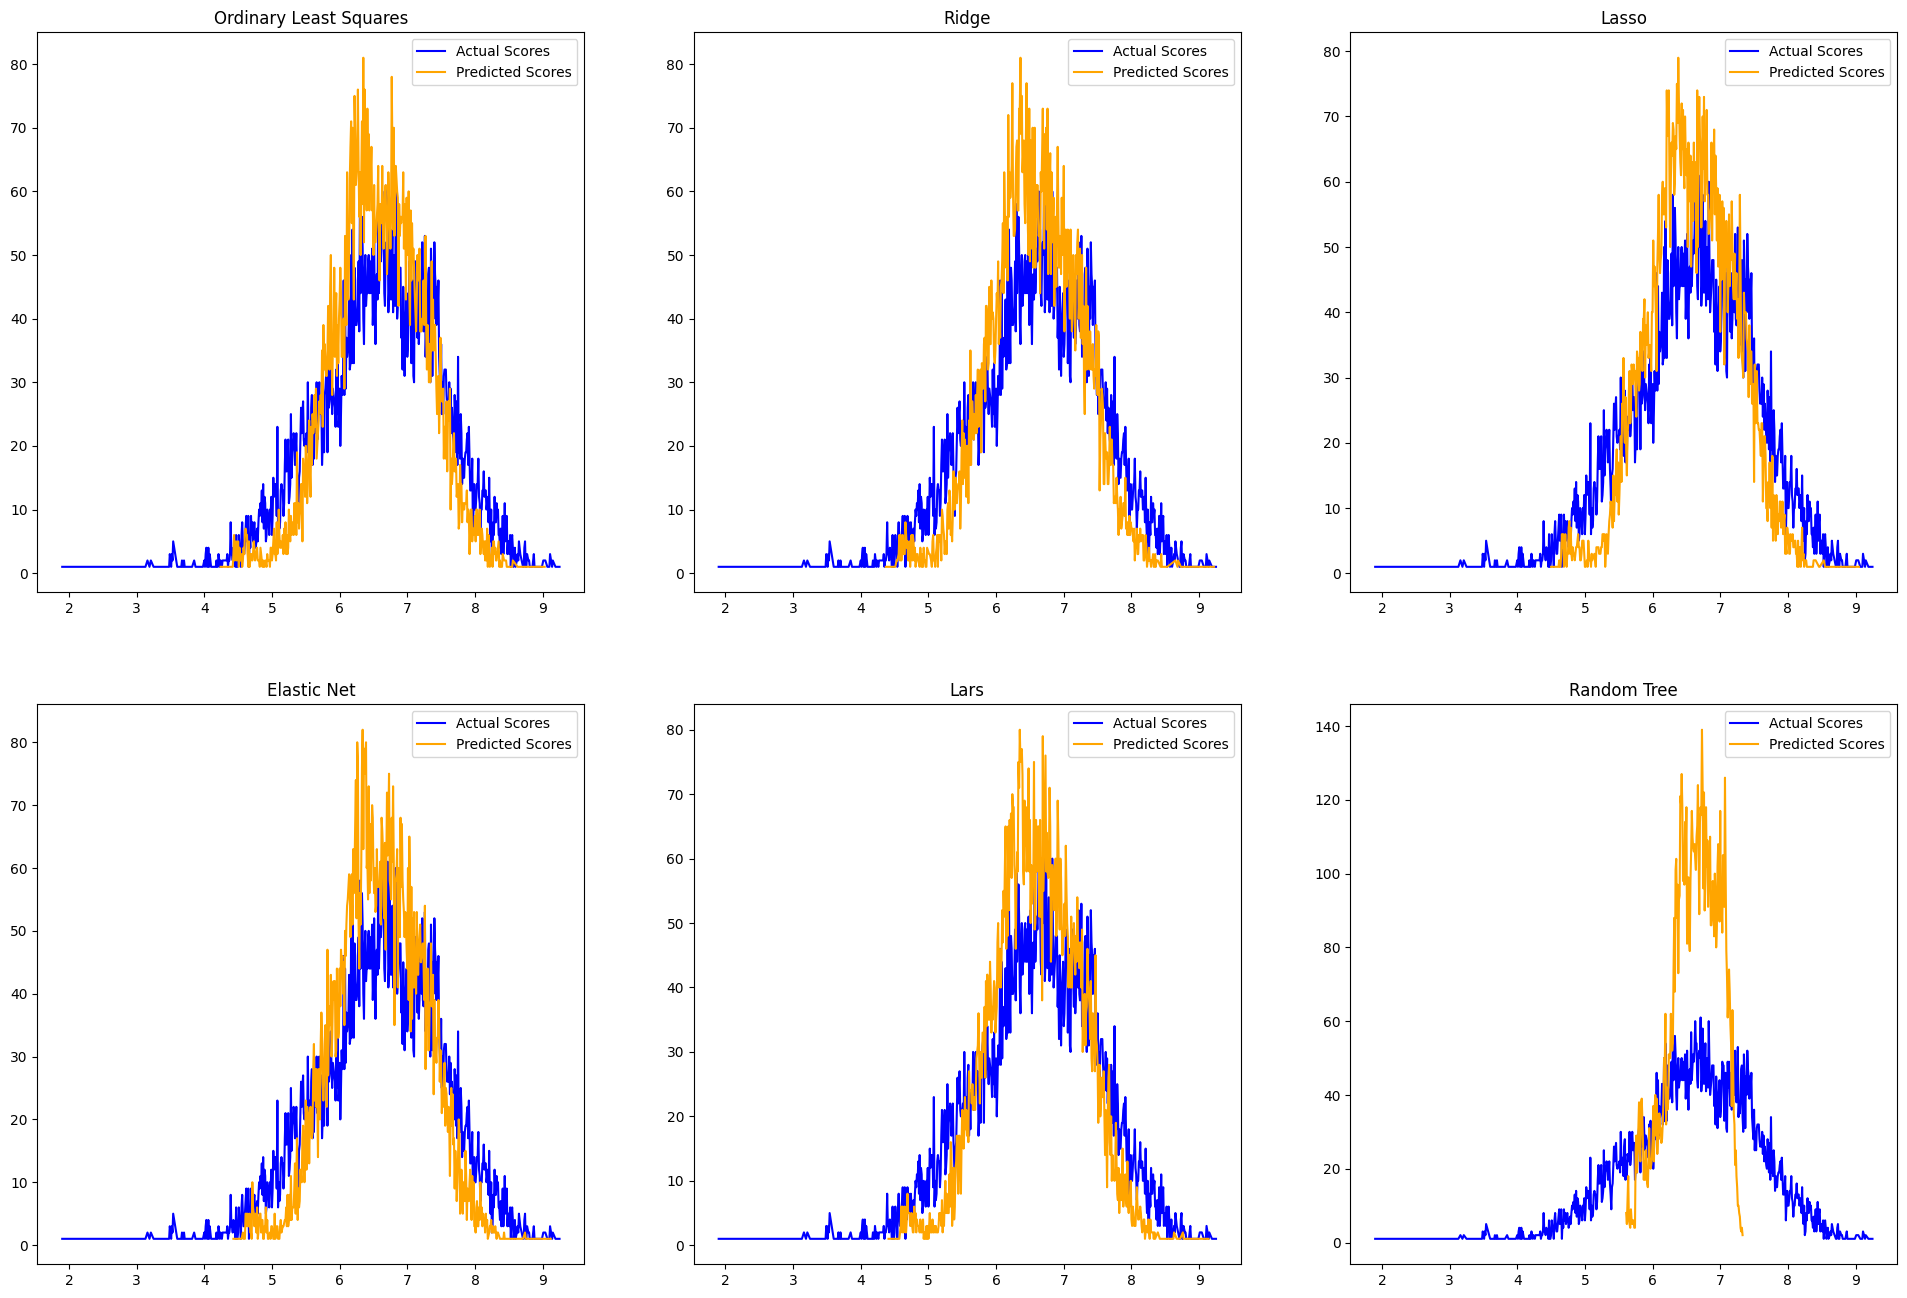

In [145]:
figure, axis = plt.subplots(2, 3)

figure.set_figwidth(24)
figure.set_figheight(16)

actual_color = 'blue'
predicted_color = 'orange'
actual_label = 'Actual Scores'
predicted_label = 'Predicted Scores'

axis[0][0].plot(dfDiffOls[['score', 'title']].groupby('score').count().index,
                dfDiffOls[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[0][0].plot(dfDiffOls[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffOls[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[0][0].set_title('Ordinary Least Squares')
axis[0][0].legend()

axis[0][1].plot(dfDiffRidge[['score', 'title']].groupby('score').count().index,
                dfDiffRidge[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[0][1].plot(dfDiffRidge[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffRidge[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[0][1].set_title('Ridge')
axis[0][1].legend()

axis[0][2].plot(dfDiffLasso[['score', 'title']].groupby('score').count().index,
                dfDiffLasso[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[0][2].plot(dfDiffLasso[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffLasso[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[0][2].set_title('Lasso')
axis[0][2].legend()

axis[1][0].plot(dfDiffElastic[['score', 'title']].groupby('score').count().index,
                dfDiffElastic[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[1][0].plot(dfDiffElastic[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffElastic[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[1][0].set_title('Elastic Net')
axis[1][0].legend()

axis[1][1].plot(dfDiffLars[['score', 'title']].groupby('score').count().index,
                dfDiffLars[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[1][1].plot(dfDiffLars[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffLars[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[1][1].set_title('Lars')
axis[1][1].legend()

axis[1][2].plot(dfDiffRandomTree[['score', 'title']].groupby('score').count().index,
                dfDiffRandomTree[['score', 'title']].groupby('score').count().values.flat,
                color=actual_color, label=actual_label)
axis[1][2].plot(dfDiffRandomTree[['predictedScores', 'title']].groupby('predictedScores').count().index,
                dfDiffRandomTree[['predictedScores', 'title']].groupby('predictedScores').count().values.flat,
                color=predicted_color, label=predicted_label)
axis[1][2].set_title('Random Tree')
axis[1][2].legend()

plt.show()